**图像分割（image segmentation）**  

图像分割的目标是将一幅图像划分成不同的区域，每个区域具有相似的特征。这些区域可以是图像中的对象、背景或者其他有意义的部分。图像分割可以分为两种类型：基于边界的分割和基于区域的分割。 基于边界的分割方法试图找到图像中不同区域之间的边界，即将图像分割成若干个边界清晰的区域。常用的基于边界的分割方法有边缘检测、边缘链接等。 基于区域的分割方法则试图将图像分割成一些相似的区域，即将图像分割成若干个颜色、纹理或者亮度相似的区域。常用的基于区域的分割方法有基于阈值的方法、区域生长算法等。  



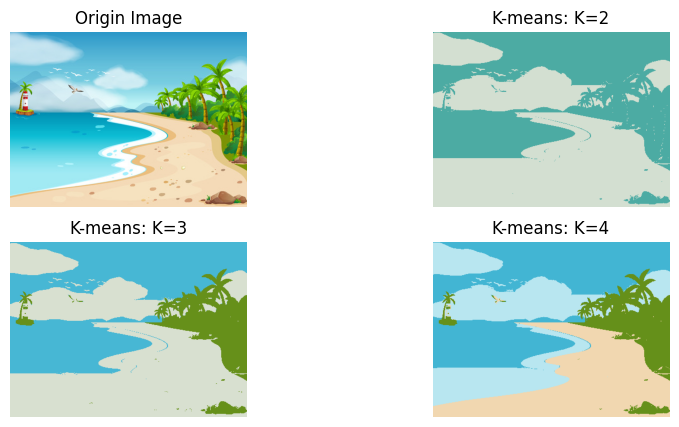

Dnoe!


In [13]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

path = './03_data/Image01.jpg'
img = cv2.imread(path)

img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
twoDimage = img.reshape((-1,3))
twoDimage = np.float32(twoDimage)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
attempts=10


# 使用 Matplotlib 显示图像
plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)  # (行数, 列数, 子图编号)
plt.imshow(img)
plt.axis('off')  # 不显示坐标尺寸
plt.title('Origin Image')

#Kmeans K = 2
K = 2
ret,label,center=cv2.kmeans(twoDimage,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

plt.subplot(2, 2, 2)  # (行数, 列数, 子图编号)
plt.imshow(result_image)
plt.axis('off')  # 不显示坐标尺寸
plt.title('K-means: K=2')

#Kmeans K = 3
K = 3
ret,label,center=cv2.kmeans(twoDimage,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

plt.subplot(2, 2, 3)  # (行数, 列数, 子图编号)
plt.imshow(result_image)
plt.axis('off')  # 不显示坐标尺寸
plt.title('K-means: K=3')

#Kmeans K = 4
K = 4
ret,label,center=cv2.kmeans(twoDimage,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

plt.subplot(2, 2, 4)  # (行数, 列数, 子图编号)
plt.imshow(result_image)
plt.axis('off')  # 不显示坐标尺寸
plt.title('K-means: K=4')

plt.show()


print("Dnoe!")

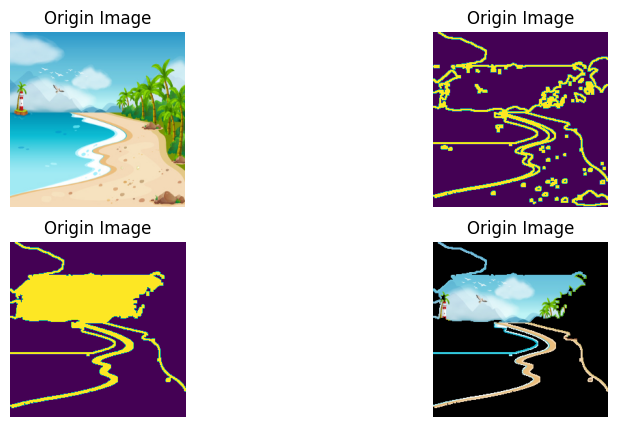

In [15]:
# 基于轮廓检测（Contour Detection）
import cv2
import matplotlib.pyplot as plt
import numpy as np

path = './03_data/Image01.jpg'
img = cv2.imread(path)
img = cv2.resize(img,(256,256))

# 使用 Matplotlib 显示图像
plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)  # (行数, 列数, 子图编号)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.axis('off')  # 不显示坐标尺寸
plt.title('Origin Image')

#图像预处理
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
_,thresh = cv2.threshold(gray, np.mean(gray), 255, cv2.THRESH_BINARY_INV)
edges = cv2.dilate(cv2.Canny(thresh,0,255),None)

plt.subplot(2, 2, 2)  # (行数, 列数, 子图编号)
plt.imshow(edges)
plt.axis('off')  # 不显示坐标尺寸
plt.title('Origin Image')

#轮廓检测
cnt = sorted(cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-1] #轮廓检测与排序
mask = np.zeros((256,256), np.uint8)
masked = cv2.drawContours(mask, [cnt],-1, 255, -1)

plt.subplot(2, 2, 3)  # (行数, 列数, 子图编号)
plt.imshow(masked)
plt.axis('off')  # 不显示坐标尺寸
plt.title('Origin Image')

#区域分割
dst = cv2.bitwise_and(img, img, mask=mask)
segmented = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

plt.subplot(2, 2, 4)  # (行数, 列数, 子图编号)
plt.imshow(segmented)
plt.axis('off')  # 不显示坐标尺寸
plt.title('Origin Image')

plt.show()

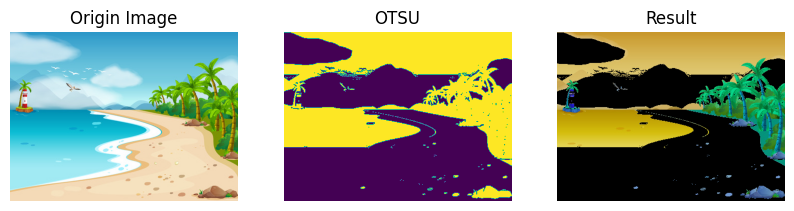

In [19]:
# 基于阈值（Thresholding）

import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
import cv2

path ='./03_data/Image01.jpg'
img = cv2.imread(path)

img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray=cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)

def filter_image(image, mask):
    r = image[:,:,0] * mask
    g = image[:,:,1] * mask
    b = image[:,:,2] * mask
    return np.dstack([r,g,b])

thresh = threshold_otsu(img_gray) #找阈值
img_otsu  = img_gray < thresh
filtered = filter_image(img, img_otsu)

# 使用 Matplotlib 显示图像
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)  # (行数, 列数, 子图编号)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.axis('off')  # 不显示坐标尺寸
plt.title('Origin Image')


plt.subplot(1, 3, 2)  # (行数, 列数, 子图编号)
plt.imshow(img_otsu)
plt.axis('off')  # 不显示坐标尺寸
plt.title('OTSU')


plt.subplot(1, 3, 3)  # (行数, 列数, 子图编号)
plt.imshow(filtered)
plt.axis('off')  # 不显示坐标尺寸
plt.title('Result')

plt.show()

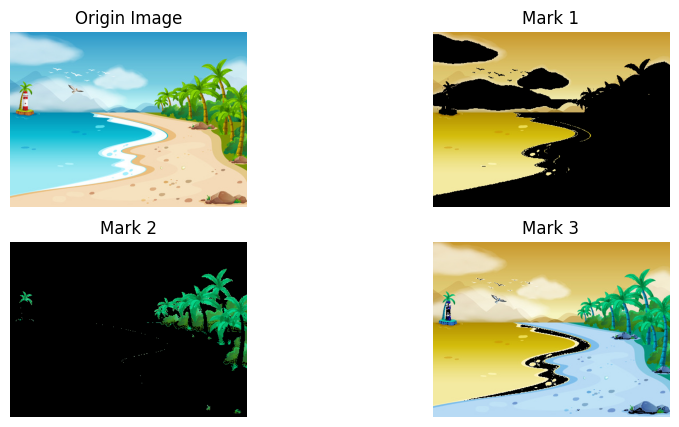

In [29]:
# 基于颜色掩码（color mask）

import cv2
path ='./03_data/Image01.jpg'
img = cv2.imread(path)

rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2HSV)

#定义HSV颜色区间范围
#Mask1, 在这个颜色范围内的显示，注意这个hsv颜色，不是RGB颜色
light_1 = (90, 70, 50)
dark_1 = (128, 255, 255)

mask1 = cv2.inRange(hsv_img, light_1, dark_1)
result1 = cv2.bitwise_and(img, img, mask=mask1)

#Mask 2
light_2 = (40, 40, 40)
dark_2 = (70, 255, 255)

mask2 = cv2.inRange(hsv_img, light_2, dark_2)
result2 = cv2.bitwise_and(img, img, mask=mask2)

#green
light_3 = (10, 10, 10)
dark_3 = (255, 255, 255)

mask3 = cv2.inRange(hsv_img, light_3, dark_3)
result3 = cv2.bitwise_and(img, img, mask=mask3)

# 使用 Matplotlib 显示图像
plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)  # (行数, 列数, 子图编号)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.axis('off')  # 不显示坐标尺寸
plt.title('Origin Image')

plt.subplot(2, 2, 2)  # (行数, 列数, 子图编号)
plt.imshow(result1)
plt.axis('off')  # 不显示坐标尺寸
plt.title('Mark 1')

plt.subplot(2, 2, 3)  # (行数, 列数, 子图编号)
plt.imshow(result2)
plt.axis('off')  # 不显示坐标尺寸
plt.title('Mark 2')

plt.subplot(2, 2, 4)  # (行数, 列数, 子图编号)
plt.imshow(result3)
plt.axis('off')  # 不显示坐标尺寸
plt.title('Mark 3')

plt.show()

**分水岭算法函数watershed**  

分水岭分割方法，是一种基于拓扑理论的数学形态学的分割方法，其基本思想是把图像看作是测地学上的拓扑地貌，图像中每一点像素的灰度值表示该点的海拔高度，每一个局部极小值及其影响区域称为集水盆，而集水盆的边界则形成分水岭。分水岭的概念和形成可以通过模拟浸入过程来说明。在每一个局部极小值表面，刺穿一个小孔，然后把整个模型慢慢浸入水中，随着浸入的加深，每一个局部极小值的影响域慢慢向外扩展，在两个集水盆汇合处构筑大坝，即形成分水岭。  

分水岭计算分两个步骤，一个是排序过程，一个是淹没过程。首先对每个像素的灰度级进行从低到高排序，然后在从低到高实现淹没过程中，对每一个局部极小值在h阶高度的影响域采用先进先出(FIFO)结构进行判断及标注。  

分水岭变换得到的是输入图像的集水盆图像，集水盆之间的边界点，即为分水岭。显然，分水岭表示的是输入图像极大值点。因此，为得到图像的边缘信息，通常把梯度图像作为输入图像。  


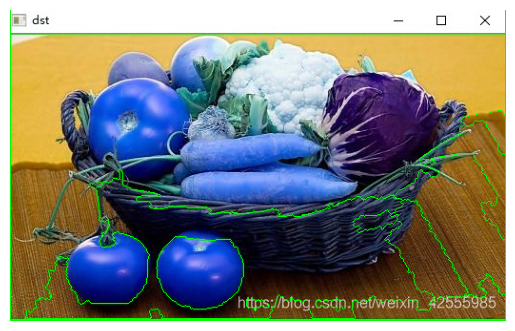

In [31]:
# -*- coding: cp936 -*-
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step1. 加载图像
img = cv2.imread('./03_data/Image02.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Step2.阈值分割，将图像分为黑白两部分
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
cv2.imshow("thresh", thresh)

# Step3. 对图像进行“开运算”，先腐蚀再膨胀
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
cv2.imshow("opening", opening)

# Step4. 对“开运算”的结果进行膨胀，得到大部分都是背景的区域
sure_bg = cv2.dilate(opening, kernel, iterations=3)
cv2.imshow("sure_bg", sure_bg)

# Step5.通过distanceTransform获取前景区域
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.6 * dist_transform.max(), 255, 0)
cv2.imshow("sure_fg", sure_fg)

# Step6. sure_bg与sure_fg相减,得到既有前景又有背景的重合区域
sure_fg = np.uint8(sure_fg)
unknow = cv2.subtract(sure_bg, sure_fg)

# Step7. 连通区域处理
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknow==255] = 0

# Step8.分水岭算法
markers = cv2.watershed(img, markers)
img[markers == -1] = [0, 255, 0] #绿色标记分水岭

# 使用 Matplotlib 显示图像
plt.imshow(img)
plt.axis('off')  # 不显示坐标尺寸
plt.show()

**GrabCut算法函数grabCut**  

GrabCut算法利用了图像中的纹理（颜色）信息和边界（反差）信息，只要小量的用户交互操作即可得到比较好的分割效果。  



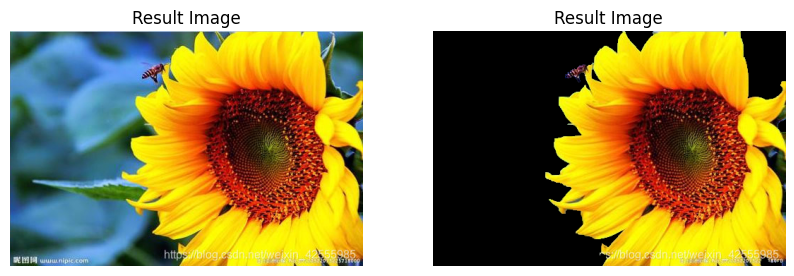

In [54]:
# -*- coding: cp936 -*-

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step1. 加载图像
img = cv2.imread('./03_data/Image03.jpg')

# Step2. 创建掩模、背景图和前景图
mask = np.zeros(img.shape[:2], np.uint8)# 创建大小相同的掩模
bgdModel = np.zeros((1,65), np.float64)# 创建背景图像
fgdModel = np.zeros((1,65), np.float64)# 创建前景图像

# Step3. 初始化矩形区域
# 这个矩形必须完全包含前景
rect = (50,0,450,333) #格式为（x, y, w, h）
#rect = (0,0,50,50) #格式为（x, y, w, h）

# Step4. GrubCut算法，迭代5次
# mask的取值为0,1,2,3
# 这个函数是指定Rect范围，认为这个范围内是图像的主体，然后把不属于主体的部分删除（设置掩码）
cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT) # 迭代5次


plt.show()
# Step5. mask中，值为2和0的统一转化为0, 1和3转化为1
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
result = img * mask2[:,:,np.newaxis] # np.newaxis 插入一个新维度，相当于将二维矩阵扩充为三维

# 使用 Matplotlib 显示图像
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)  # (行数, 列数, 子图编号)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.axis('off')  # 不显示坐标尺寸
plt.title('Result Image')

plt.subplot(1, 2, 2)  # (行数, 列数, 子图编号)
plt.imshow(cv2.cvtColor(result,cv2.COLOR_BGR2RGB))
plt.axis('off')  # 不显示坐标尺寸
plt.title('Result Image')

plt.show()

结果如上图，左边是grabCut结果，右边是原图。  
这个算法的关键就是，在开始用户画一个矩形方块把前景图圈起来，前景区域应该完全在矩形内，然后算法反复进行分割以达到最好效果。
图中的向日葵就是前景。  
这个图大小是500*333，所以把矩形框设置为(50,0,450,333)，这样可以把整个向日葵包含其中。注意：矩形框格式为（x, y, w, h）。  

感觉GrabCut算法实现比分水岭算法简单多了，效果也很好。  



**进阶应用** 
观察左边图片中，可以注意到在右边还是有一小部分区域（2个花瓣之间）没有被识别为背景。我们可以继续利用上面的方法把它也识别出来。
再设置一个矩形框
对这个区域进行GrabCut，然后显示结果。


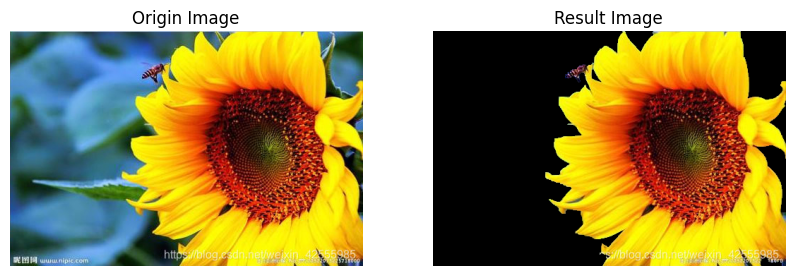

In [57]:
# -*- coding: cp936 -*-

import cv2
import numpy as np

# Step1. 加载图像
img = cv2.imread('./03_data/Image03.jpg')

# Step2. 创建掩模、背景图和前景图
mask = np.zeros(img.shape[:2], np.uint8)# 创建大小相同的掩模
mask3 = np.zeros(img.shape[:2], np.uint8)# 创建大小相同的掩模
bgdModel = np.zeros((1,65), np.float64)# 创建背景图像
fgdModel = np.zeros((1,65), np.float64)# 创建前景图像

# Step3. 初始化矩形区域
# 这个矩形必须完全包含前景
rect =  (50,0,450,333) #格式为（x, y, w, h）
rect1 = (450,0,50,300) #格式为（x, y, w, h）#去除右边一小部分第一次没有被识别区域

# Step4. GrubCut算法，迭代5次
# mask的取值为0,1,2,3
#第一次识别
cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT) # 迭代5次

#第二次识别
cv2.grabCut(img, mask3, rect1, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT) # 迭代5次

# Step5. mask中，值为2和0的统一转化为0, 1和3转化为1
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
mask4 = np.where((mask3 == 2) | (mask3 == 0), 0, 1).astype('uint8')
mask5 = np.where( mask4 == 0, 1, 0).astype('uint8')
mask6 =np.multiply(mask2,mask5)
                 
 # np.newaxis 插入一个新维度，相当于将二维矩阵扩充为三维
result = img * mask6[:,:,np.newaxis]

# 使用 Matplotlib 显示图像
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)  # (行数, 列数, 子图编号)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.axis('off')  # 不显示坐标尺寸
plt.title('Origin Image')

plt.subplot(1, 2, 2)  # (行数, 列数, 子图编号)
plt.imshow(cv2.cvtColor(result,cv2.COLOR_BGR2RGB))
plt.axis('off')  # 不显示坐标尺寸
plt.title('Result Image')

plt.show()


In [ ]:
https://www.aiuai.cn/aifarm1896.html
https://blog.csdn.net/weixin_42555985/article/details/93713477
https://bbs.huaweicloud.com/blogs/410736